### 1.  Приоритизация гипотез

In [1]:
# импорт библиотек pandas, scipy, numpy, matplotlib и stats
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# отображение графиков в jupyter'e
%matplotlib inline

# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

# изменение дефолтного размера графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

pd.set_option('display.max_colwidth', 0)

Прежде чем приступить к проведению А/В тестирования необходимо определить самые приоритетные для проверки гипотезы. 

Для этого применим фреймворки ICE и RICE и определим изменятся ли результаты при применении этих методов приоритизации. Исходя из полученных результатов определим наиболее приоритетную для тестирования гипотезу.

Для начала ознакомимся с данными из файла `hypothesis.csv`.

In [2]:
# чтение таблицы с данными и сохранение в hypothesis
try:
    hypothesis = pd.read_csv('hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Итак, в нашем файле содержится 9 гипотез с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`. 

Применим фреймворк ICE для приоритизации гипотез.

Фреймворк ICE состоит из трех компонент:

* `Impact` — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* `Confidence` — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
* `Efforts` — сколько стоит протестировать эту гипотезу. 

In [3]:
# применение фреймворка ICE для приоритизации гипотез
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']), 1)
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


Исходя из результатов применения фреймворка ICE мы видим, что 8 гипотеза (запустить акцию, дающую скидку на товар в день рождения) является наиболее приоритетной.

Применим фреймворк RICE и сравним результаты.

Фреймворк RICE состоит из четырёх компонент:
* `Reach` — скольких пользователей затронет изменение, которое вы хотите внести;
* `Impact` — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* `Confidence` — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
* `Efforts` — сколько стоит протестировать эту гипотезу. 

In [4]:
# применение фреймворка RICE для приоритизации гипотез
hypothesis['RICE'] = round((hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']), 1)
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


Мы видим, что при применения фреймворка RICE результаты изменились. Теперь гипотеза номер 7 (добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок) является самой приоритетной. Это произошло из-за того, что при применения фреймворка ICE не учитывалось количество пользователей, которых затронет изменение. 

#### Вывод

Мы применили фреймворки ICE и RICE для приоритизации гипотез.

В случае применения фреймворка ICE мы определили, что гипотеза №8 является наиболее приоритетной.

Однако в случае применения RICE гипотеза №7 была определена, как наиболее приоритетная. Это произошло из-за того, что при применении фреймворка ICE не учитывалось количество пользователей, которых затронет изменение.

Таким образом, так как фреймворк RICE учитывает большее количество факторов для приоритизации, мы рекомендуем присмотреться к результатам его применения и определить гипотезу №7 как наиболее приоритетную для запуска тестирования.

### 2. Анализ А/В теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах  `/datasets/orders.csv` и `/datasets/visitors.csv`.
Прочтем данные и сохраним их в переменных `orders` и `visitors`.

In [5]:
# чтение таблиц с данными и сохранение в orders и visitors
try:
    orders, visitors = (
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv')
    )
except:
    orders, visitors = (
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )
    
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Ознакомимся с данными в таблицах.

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Итак, в таблице `orders` 5 столбцов и 1197 строк. Пропущенных значений нет. В столбце с датой необходимо заменить тип данных с `object` на `datetime`. В таблице `visitors` 3 столбца и 62 строки, пропущенных значений нет. Столбец с датой так же требует замены типа данных на корректный.

In [9]:
# приведение столбцов с датой к нужному типу данных
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим данные на наличие дубликатов.

In [10]:
# проверка на наличие дубликатов в таблице orders
orders.duplicated().sum()

0

In [11]:
# проверка на наличие дубликатов в таблице visitors
orders.duplicated().sum()

0

Дубликатов нет. Можем приступать к анализу состава групп.

In [12]:
# сумма всех участников
visitors.visitors.sum()

37652

Мы видим, что всего в тестировании приняли участие 37652 пользователя.


In [13]:
# разбивка участников по группам
visitorsGrouped = visitors.groupby('group').agg({'visitors':'sum'})
# подсчёт процентного соотношения
visitorsGrouped['share'] = round((visitorsGrouped['visitors'] / sum(visitorsGrouped['visitors']) * 100) , 1)
visitorsGrouped

,visitors,share
group,,
A,18736,49.8
B,18916,50.2


Мы видим, что количество участников в двух группах практически совпадает и делятся в соотношении 50/50. Проверим, есть ли пересечения среди пользователей в разных группах.

In [31]:
# срез заказов по группе А
ordersA = orders[orders['group'] == 'A']
# срез заказов по группе В
ordersB = orders[orders['group'] == 'B']
# проверка пересечений
ordersA['visitorId'].isin(ordersB['visitorId']).sum()

89

Мы обнаружили 89 заказов от пользователей, которые попали как в одну, так и в другую группу. Определим процентное сотношение заказов от таких пользователей от общего количества заказов.

In [32]:
(ordersA['visitorId'].isin(ordersB['visitorId']).sum()) / orders['visitorId'].count() * 100

7.435254803675856

Данные заказы составляют около 7% от общего количества заказов, это довольно большой процент. Такие заказы могут значительно исказить результаты исследования, однако мы не можем от них избавиться, так как не может отделить их сессии из таблицы `visitors` и таким образом данные в любом случае будут искажаться.

Теперь можем приступить к анализу результата А/В-тестирования. 

Построим график кумулятивной выручки по группам.

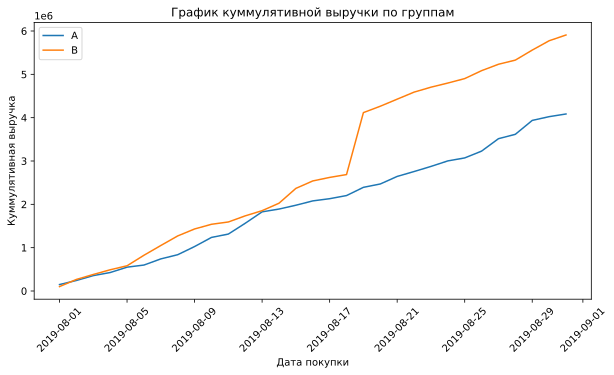

In [16]:
# создание массива уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

# получение агрегированных кумулятивных по дням данных о заказах 
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
               .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
               .sort_values(by=['date','group'])
)

# получение агрегированных кумулятивных по дням данных о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
               .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
               .sort_values(by=['date','group'])
)

# объединение кумулятивных данных в одной таблице и присваивание ее столбцам понятных названий
cumulativeData = ordersAggregated.merge(visitorsAggregated, 
                                        left_on=['date', 'group'], 
                                        right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# построение графика выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# построение графика выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График куммулятивной выручки по группам')
plt.xlabel('Дата покупки')
plt.ylabel('Куммулятивная выручка')
plt.xticks(rotation=45)
plt.legend()

None

Мы видим, что выручка почти равномерно увеличивается на протяжении всего теста. Однако, в одной точке график выручки группы В резко растет вверх. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке, что может исказить результаты исследования. Необходимо будет провести проверку на выбросы.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

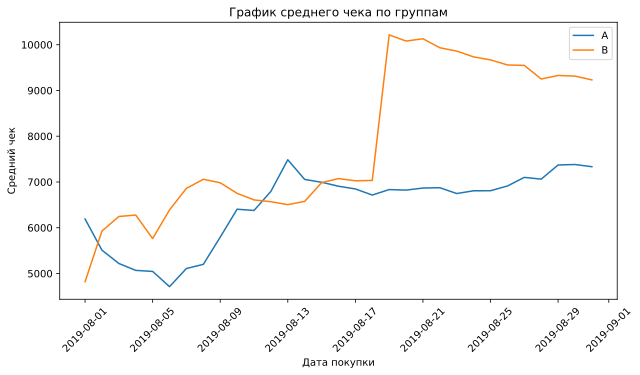

In [17]:
# Построение графика среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
# Построение графика среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График среднего чека по группам')
plt.xlabel('Дата покупки')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.legend() 
None

Средний чек также становится равномерным ближе к концу теста: установился для группы A и спадает после резкого всплеска для группы В, что так же может говорить о выбросах в данных в группе В.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

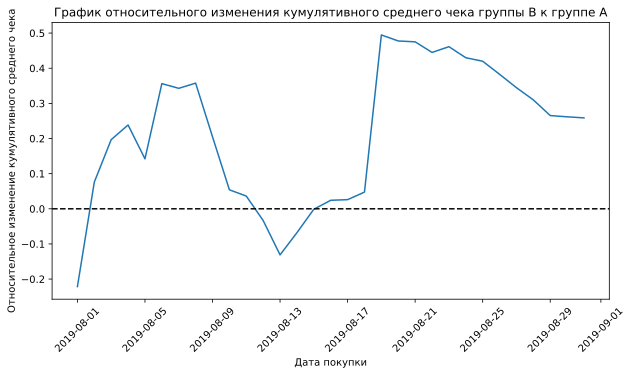

In [18]:
# объединение данных в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# построение графика отношения средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата покупки')
plt.ylabel('Относительное изменение кумулятивного среднего чека')
plt.xticks(rotation=45)
None

В нескольких точках график различия среднего чека между сегментами резко «скачет», что так же подтверждает наличие выбросов в собранных данных. При этом к концу теста мы видим, что все-таки средний чек группы В больше среднего чека группы А, однако это может быть искажением из-за выбросов. Рассмотрим график кумулятивного среднего количества заказов на посетителя по группам.

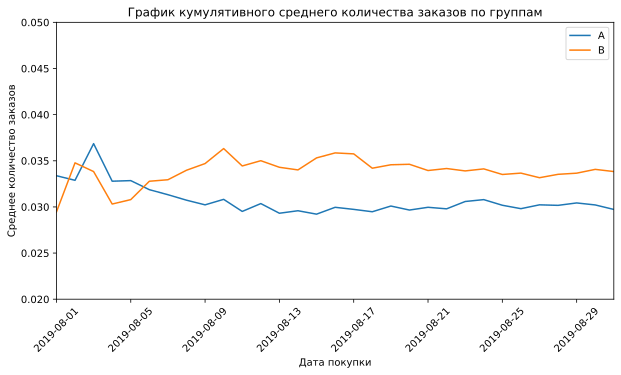

In [19]:
# подсчёт кумулятивной конверсии
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# построение графиков
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов по группам')
plt.xlabel('Дата покупки')
plt.ylabel('Среднее количество заказов')
plt.xticks(rotation=45)
plt.legend()

# масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.02, 0.05])
None

График получился почти симметричный. Значение среднего количества заказов колебалось в начале теста, однако затем зафиксировалось и на протяжении почти всего времени мы наблюдаем то, что среднее количество заказов больше у группы В.

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

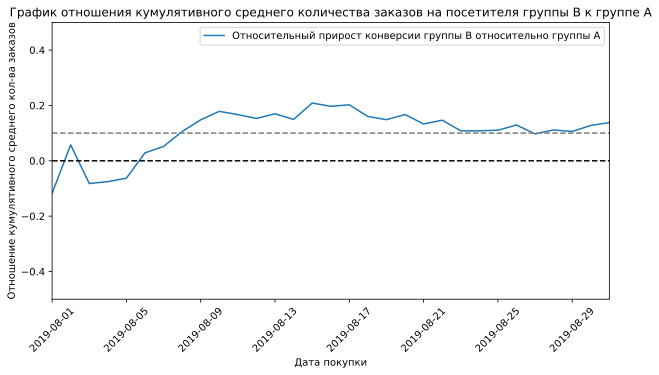

In [20]:
# объединение данных в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('График отношения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата покупки')
plt.ylabel('Отношение кумулятивного среднего кол-ва заказов')
plt.xticks(rotation=45)
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5])
None

Также, как и на предыдущем графике, мы видим, что среднее количество заказов группы В на протяжении почти всего теста больше среднего количества заказов группы А. Поэтому на первый взгляд, может показаться, что изменения положительно отразились на среднем количестве заказов. Однако, делать такие выводы преждевременно. Сперва, необходимо проверить данные на выбросы, при их наличии очистить данные от них и затем провести проверку статистической значимости этих изменений.

Построим точечный график количества заказов по пользователям.

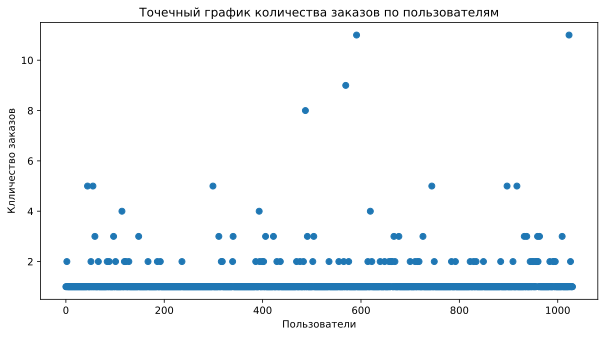

In [21]:
# аггрегация заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

# генерация номеров наблюдений
x_values = pd.Series(range(0,len(ordersByUsers)))

# построение графика распределения количества заказов по пользователям
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Клличество заказов')
None

Мы видим, что большинство пользователей совершали по 1 заказу, доля пользователей с 2 заказами и более не так значительна. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и определим границу для определения аномальных пользователей.

In [33]:
# определение 95 и 99 перцентилей
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Мы можем сделать вывод о том, что не более 5% пользователей совершали более 2 заказов, и не более 1% совершали более 4 заказов. Примем за аномальных пользоывателей тех, кто совершил более 2 заказов. Таким образом, мы отсеим 1% наблюдений с аномальными значениями.

Построим точечный график стоимостей заказов. 

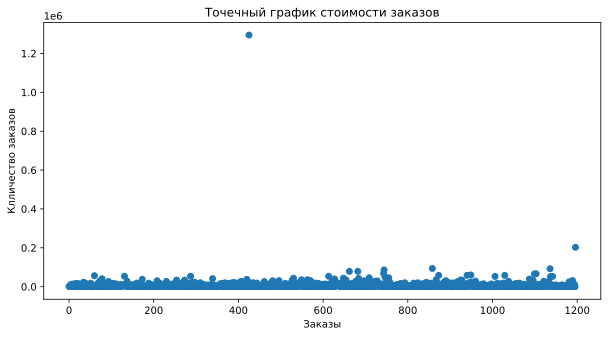

In [34]:
# генерация номеров наблюдений
x_values = pd.Series(range(0,len(orders['revenue'])))
# построение графика распределения стоимости заказов 
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Клличество заказов')
None

На данном графике видно два аномально дорогих заказа. Изменим масштаб графика, чтобы рассмотреть остальные стоимости заказов поближе.

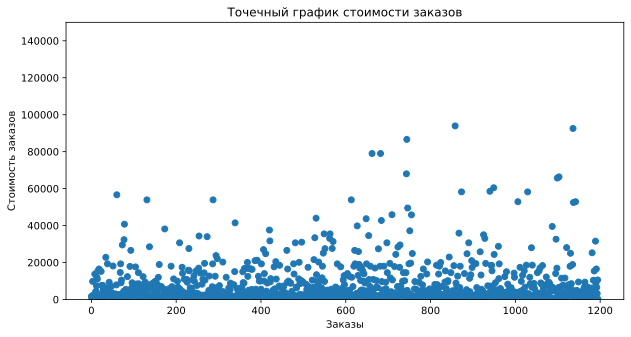

In [35]:
# генерация номеров наблюдений
x_values = pd.Series(range(0,len(orders['revenue'])))
# построение графика распределения стоимости заказов 
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.ylim(0, 150000)
None

На графике видно, что в большинстве случае стоимость заказов не превышает 100000 рублей. Для определения более точной цифры рассчитаем 95 и 99 перцентили.

In [36]:
# определение 95 и 99 перцентилей
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Мы видим, что не более 5% стоимости заказов превышает 28000 рублей, и не более 1% стоимости заказов превышают 58233 рубля. Примем за аномальные стоимости покупки те, которые превышают 28000 рублей. Таком образом мы отсеем от 1% до 5% наблюдений с крайними значениями.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы. 
* Нулевая: различий в среднем количестве заказов по "сырым" данным между группами нет. 
* Альтернативная: различия в среднем по "сырым" данным между группами есть.

In [26]:
# определение пользователей в день группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# кумулятивное количество пользователей группы А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# определение пользователей в день группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# кумулятивное количество пользователей группы В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# определение заказов в день группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# кумулятивное количество заказов группы А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# определение заказов в день группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# кумулятивное количество заказов группы В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# объединение всех данных в одну таблицу
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# определение количества заказаов для каждого пользователя, совершившего хотя бы 1 заказ из группы А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

# определение количества заказаов для каждого пользователя, совершившего хотя бы 1 заказ из группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# присвоение пользователям из группы А, совершившим хотя бы 1 заказ, количество заказов, а не совершившим ни одного заказа - ноль
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# присвоение пользователям из группы В, совершившим хотя бы 1 заказ, количество заказов, а не совершившим ни одного заказа - ноль
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# проверка сатистической значимости критерием Манна-Уитни
print('p-значение:'"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
# расчёт относительных различий в среднем количестве заказов между группами
print('Относительное различие в среднем количестве заказов между группами:'"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-значение:0.017
Относительное различие в среднем количестве заказов между группами:0.138


При значении статистической значимости 5%, мы видим, что по "сырым" данным различия в среднем количестве заказов статистически значимы.

Первое число — p-value = 0.017, что меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, можно отвергнуть. Относительный выигрыш группы B в среднем количестве заказов равен 13.8% — второе число в выводе.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 
* Нулевая гипотеза: различий в среднем чеке между группами нет. 
* Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [27]:
# проверка сатистической значимости критерием Манна-Уитни
print('p-значение:''{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
# расчёт относительных различий в среднем чеке между группами
print('Относительное различие в среднем чеке между группами:''{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение:0.729
Относительное различие в среднем чеке между группами:0.259


При значении статистической значимости 5%, мы видим, что по "сырым" данным различия в среднем чеке статистически не значимы.

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом, средний чек группы B значительно выше среднего чека группы A - на четверть. Однако, мы помним, что расчёт осуществлялся на данных с выбросами. 

Очистим данные от аномальных значений. Уберем из данных пользователей, совершивших более 2 заказов и заказы стоимостью более 28000 рублей.

In [28]:
# срез данных по количеству заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
# срез данных по стоимости заказа
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

# объединение данных в одну таблицу с аномальными значениями
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Мы обнаружили 74 аномальных пользователя.

Теперь посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Сформулируем гипотезы. 
* Нулевая: различий в среднем количестве заказов по "очищенным" данным между группами нет. 
* Альтернативная: различия в среднем по "очищенным" данным между группами есть.

In [29]:
# очистка данных группы А
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# очистка данных группы В
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# проверка сатистической значимости критерием Манна-Уитни
print('p-значение:''{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
# расчёт относительных различий в среднем количестве заказов между группами
print('Относительное различие в среднем количестве заказов между группами:''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-значение:0.013
Относительное различие в среднем количестве заказов между группами:0.173


Значения "очищенных данных" почти не изменились. Первое число — p-value = 0.013, что меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, можно отвергнуть. Относительный выигрыш группы B в среднем количестве заказов равен 17.3%.

Проверим изменения в результатах по среднему чеку.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 

* Нулевая гипотеза: различий в среднем чеке по "очищенным" данным между группами нет. 
* Альтернативная гипотеза: различия в среднем чеке по "очищенным" данным между группами есть. 

In [30]:
# проверка сатистической значимости критерием Манна-Уитни
print('p-значение:'
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

# расчёт относительных различий в среднем чеке между группами
print('Относительное различие в среднем чеке между группами:'
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-значение:0.738
Относительное различие в среднем чеке между группами:-0.020


А вот результаты по среднему чеку заметно изменились. P-value так и осталось значительно больше 0.05, что убеждает нас в том, что причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако, очистив данные от выбросов по стоимости заказа, мы видим, что средний чек группы B стал даже ниже среднего чека группы A - на 2%.

#### Вывод

Исходя из всего вышеперечисленного мы можем сделать выводы о том, что:

1) Мы определили статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий. Значения показателя улучшилось в среднем на 17%.

2) Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.

3) График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A на протяжении почти всего времени проведения тестирования.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент А на самом деле лучше сегмента В — практически нулевая.

### Общий вывод

Перед нами стояла цель исследования - приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

Мы изучили гипотезы и применили фреймворки ICE и RICE для их приоритизации.

В случае применения фреймворка ICE мы определили, что гипотеза №8 является наиболее приоритетной.

Однако в случае применения RICE гипотеза №7 была определена, как наиболее приоритетная. Это произошло из-за того, что при применении фреймворка ICE не учитывалось количество пользователей, которых затронет изменение.

Таким образом, так как фреймворк RICE учитывает большее количество факторов для приоритизации, мы рекомендуем присмотреться к результатам его применения и определить гипотезу №7 как наиболее приоритетную для запуска тестирования.

Затем мы проанализировали результаты проведенного А/В теста и определили, что выручка почти равномерно росла на протяжении всего теста. Однако, в одной точке график выручки группы В резко растет вверх. Это сигнализировало нам о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке, что могло бы исказить результаты исследования. 

Средний чек становился равномерным ближе к концу теста: установился для группы A и спадал после резкого всплеска для группы В, что так же говорило о выбросах в данных в группе В.

В нескольких точках график различия среднего чека между сегментами резко «скакал», что так же подтверждало наличие выбросов в собранных данных. 

Значение среднего количества заказов колебалось в начале теста, однако затем зафиксировалось и на протяжении почти всего времени мы наблюдали то, что среднее количество заказов больше у группы В.

Проведя проверку на выбросы мы обнаружили 74 пользователя с аномальными значениями - более 2х соверершенных заказов и заказы, стоимостью более 28000 рублей. 

Мы провели проверку статистической значимости по "сырым" и по "очищенным" данным и определили, что:

1) Существует статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий. Значение показателя в группе В улучшилось в среднем на 17%.

2) Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.

3) График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A на протяжении почти всего времени проведения тестирования.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент А на самом деле лучше сегмента В — практически нулевая.